# Introduction:

### We carried out this analysis with the hope of determining a significant relationship between heights and weights of players across two sports: baseball using MLB data and soccer using EPL and MLS data. There is a common characterization that baseball players are unathletic and sometimes regarded as 'fat' athletes. Teo and I have played soccer and baseball respectively for years and follow the professional leagues of both sports. 

### Using our knowledge of each sport and their vastly different physical demands, we set out to answer the questions:

- Is there a significant difference in player height/weight when comparing across professional soccer and baseball leagues? 

- Can a professional athletes sport be predicted with any accuracy based on their height/weight (BMI) when limiting options to soccer and baseball?

### After carrying out this analysis, it became clear to us that there is no definitive relationship between height and weight regression across a large sampling of players in both sports. When extrapolating this data using BMI, however, there is a significant difference in the distributions of player BMI across both sports. We were able to use this distribution difference to predict with relatively high accuracy (>80%) which sport a player falls under.

In [1]:
import pandas
import numpy
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Gather data from CSVs exported from data scraping/cleaning notebook
MLBData = pandas.read_csv('MLBPlayerInfo.csv')
SoccerData = pandas.read_csv('SoccerPlayerInfo.csv')

# A. Is there a significant difference in height/weight regressions when comparing professional soccer and baseball players?

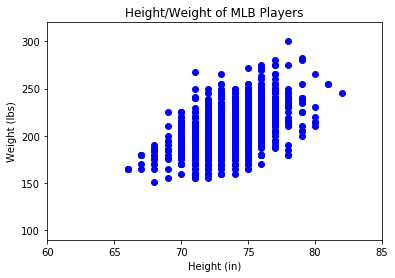

In [3]:
# Plot height (x) against weight (y) among MLB players

pyplot.scatter(MLBData['Height'], MLBData['Weight'], color='blue')
pyplot.title('Height/Weight of MLB Players')
pyplot.xlim(60, 85)
pyplot.ylim(90, 320)
pyplot.xlabel('Height (in)')
pyplot.ylabel('Weight (lbs)')
pyplot.show()

#### This plot shows MLB player height (x) as it relates to weight (y). The plot is about what we would expect as weight shows a very general trend upward with height although it's nothing concrete due to the massive scale of this data. The most common height range being 70-75 inches or so shows a large range of weights as one would expect from a sport like baseball with athletes of all different shapes and sizes. 

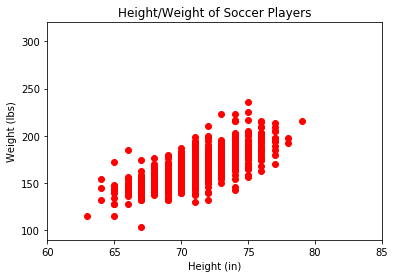

In [4]:
# Plot height (x) against weight (y) among Soccer players (EPL/MLS)
pyplot.scatter(SoccerData['Height'], SoccerData['Weight'], color='red')
pyplot.title('Height/Weight of Soccer Players')
pyplot.xlim(60, 85)
pyplot.ylim(90, 320)
pyplot.xlabel('Height (in)')
pyplot.ylabel('Weight (lbs)')
pyplot.show()

#### This plot shows soccer player height (x) as it relates to weight (y) with the same axes as above. This plot shows a more concrete linear relationship between height and weight in soccer as there is less room for large, slow players in soccer.  The most common height range also being 70-75 inches or so shows a smaller range of weights than baseball as one would expect due to the more intense physical demands of the sport.

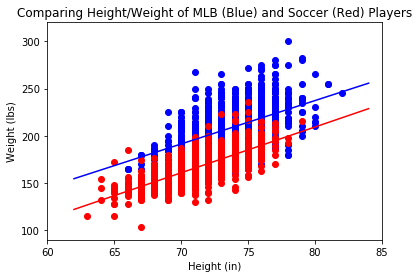

In [5]:
# Overlay the above plots and add a line of regression for both
pyplot.scatter(MLBData['Height'], MLBData['Weight'], color='blue')
pyplot.scatter(SoccerData['Height'], SoccerData['Weight'], color='red')
pyplot.title('Comparing Height/Weight of MLB (Blue) and Soccer (Red) Players')
pyplot.xlim(60, 85)
pyplot.ylim(90, 320)
pyplot.xlabel('Height (in)')
pyplot.ylabel('Weight (lbs)')

# Create soccer height/weight regression
SoccerReg = LinearRegression()
soc_x = SoccerData['Height'].values.reshape(-1,1)
soc_y = SoccerData['Weight'].values.reshape(-1,1)
SoccerReg.fit(soc_x, soc_y)

# Create MLB height/weight regression
MLBReg = LinearRegression()
mlb_x = MLBData['Height'].values.reshape(-1,1)
mlb_y = MLBData['Weight'].values.reshape(-1,1)
MLBReg.fit(mlb_x, mlb_y)

# Create MLB regression line plot
p_mlb = numpy.linspace(62,84,100)
q_mlb = MLBReg.coef_[0,0] * p_mlb + MLBReg.intercept_ 
pyplot.plot(p_mlb, q_mlb, color = 'blue')

# Create soccer regression line plot
p_soc = numpy.linspace(62,84,100)
q_soc = SoccerReg.coef_[0,0] * p_soc + SoccerReg.intercept_ 
pyplot.plot(p_soc, q_soc, color = 'red')

pyplot.show()

#### This plot shows a slight difference between height and weight in that soccer players are generally leaner with less variance than baseball players. The trendlines show a significant difference in y-intercept (weight) due to the same idea that soccer players are generally leaner even though height and weight are correlated on a very similar slope.

In [6]:
print('Slope of Soccer Height/Weight Regression: ', SoccerReg.coef_[0,0])
print('R-Squared of Soccer Height/Weight Regression: ', SoccerReg.score(soc_x, soc_y))
print('Intercept of Soccer Height/Weight Regression: ', SoccerReg.intercept_[0])

Slope of Soccer Height/Weight Regression:  4.846105111137425
R-Squared of Soccer Height/Weight Regression:  0.5609594295550016
Intercept of Soccer Height/Weight Regression:  -178.3472661160041


In [7]:
print('Slope of MLB Height/Weight Regression: ', MLBReg.coef_[0,0])
print('R-Squared of MLB Height/Weight Regression: ', MLBReg.score(mlb_x, mlb_y))
print('Intercept of MLB Height/Weight Regression: ', MLBReg.intercept_[0])

Slope of MLB Height/Weight Regression:  4.5926192417129
R-Squared of MLB Height/Weight Regression:  0.24699218803061818
Intercept of MLB Height/Weight Regression:  -130.10887125852366


#### These regression metrics make sense because both sports have a wide array of body types with such a large sample size, especially a sport like baseball where we would expect a greater variation in weights due to positions like catchers vs shortstops demanding vastly different physical characteristics. This trend is supported by the difference in intercept and the tighter R-Squared of soccer data indicating less variance. The larger variance in player physicality in MLB data leads to a less concrete regression. It can also be seen that generally weights of MLB players are higher than soccer based the significantly higher weight (y) intercept among baseball players. The intecepts are negative because a height of 0 ft 0 in isn't logical although the difference in y-axis weight intercept can be seen as roughly 48 lbs. The difference in slope appears insignificant which makes sense in such a large sample where slope just represents the change in weight as height increases.

## Permutation analysis of height/weight regressional significance 

In [8]:
# Create two functions that return permuted weights among MLB and Soccer datasets
def permuted_mlb_weight():
    return numpy.random.permutation(MLBData["Weight"].copy())

def permuted_soc_weight():
    return numpy.random.permutation(SoccerData["Weight"].copy())

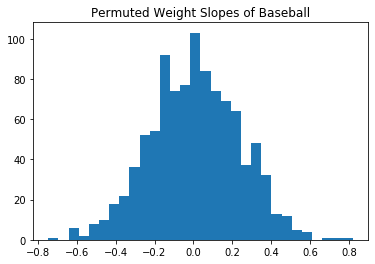

In [9]:
# Generate empty list and fill with permuted slopes of height/weight regression in MLB
slopes_perm_mlb = numpy.zeros(1000)

for i in range(1000):
    lm = LinearRegression()
    lm.fit(MLBData[['Height']].values.reshape(-1,1), permuted_mlb_weight().reshape(-1,1))
    slopes_perm_mlb[i] = lm.coef_[0,0]
    
# Plot permuted slopes as histogram
pyplot.hist(slopes_perm_mlb, bins=30)
pyplot.title('Permuted Weight Slopes of Baseball')
pyplot.show()

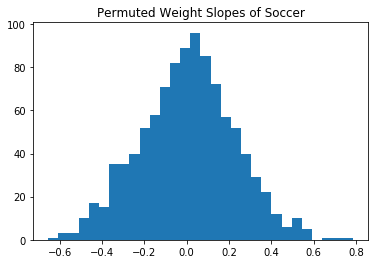

In [10]:
# Generate empty list and fill with permuted slopes of height/weight regression in soccer
slopes_perm_soc = numpy.zeros(1000)

for i in range(1000):
    lm = LinearRegression()
    lm.fit(SoccerData[['Height']].values.reshape(-1,1), permuted_soc_weight().reshape(-1,1))
    slopes_perm_soc[i] = lm.coef_[0,0]

# Plot permuted slopes as histogram
pyplot.hist(slopes_perm_soc, bins=30)
pyplot.title('Permuted Weight Slopes of Soccer')
pyplot.show()

#### The above permuted weight slopes of regression for both baseball and soccer show that the slope of the regression isn't significant at all. We already assumed this from the nominal difference in slope and somewhat inconclusive R-Squared scores but this shows that in a permuted sample of our player pools weights, there isn't a significant relationship between height and weight. When thinking about why this is, it is almost certainly due to the massive data size we have. When taking a permuted sample from such a large data pool with relatively high variance, it is to be expected that these variations would result in a normal distribution of slopes centered around 0 due to the high variability and massive scale of the data. This, however, does not mean there can't be a significant overall difference in BMI between the two sports because we saw a large difference in intercept.

# B. Can a professional athletes sport be predicted with any accuracy based on their BMI when limiting options to just soccer and baseball?

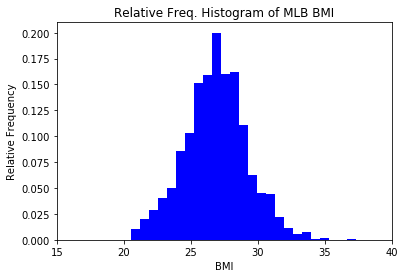

In [11]:
# Plot relative frequency histogram of MLB BMI 
pyplot.hist(MLBData['BMI'], bins=25, density=1, color='blue')
pyplot.xlim(15, 40)
pyplot.title('Relative Freq. Histogram of MLB BMI')
pyplot.xlabel('BMI')
pyplot.ylabel('Relative Frequency')
pyplot.show()

#### This histogram shows a normal distribution of MLB player BMI's centered around roughly 27 with a relatively wide range around 15 or so BMI.

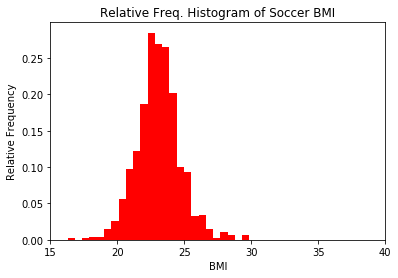

In [12]:
# Plot relative frequency histogram of soccer BMI 
pyplot.hist(SoccerData['BMI'], bins=25, density=1, color='red')
pyplot.xlim(15, 40)
pyplot.title('Relative Freq. Histogram of Soccer BMI')
pyplot.xlabel('BMI')
pyplot.ylabel('Relative Frequency')
pyplot.show()

#### This histogram shows a normal distribution of soccer player BMI's centered around roughly 23 with a slightly less wide range around 12 or so BMI.

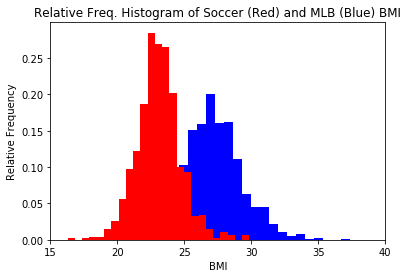

In [13]:
# Plot above relative frequency histograms of MLB and soccer BMI together  
pyplot.hist(MLBData['BMI'], bins=25, density=1, color='blue')
pyplot.hist(SoccerData['BMI'], bins=25, density=1, color='red')
pyplot.xlim(15, 40)
pyplot.title('Relative Freq. Histogram of Soccer (Red) and MLB (Blue) BMI')
pyplot.xlabel('BMI')
pyplot.ylabel('Relative Frequency')
pyplot.show()

In [14]:
print('Soccer BMI Mean: ', SoccerData['BMI'].mean())
print('MLB BMI Mean: ', MLBData['BMI'].mean())
print('Soccer BMI Standard Deviation: ', SoccerData['BMI'].std())
print('MLB BMI Standard Deviation: ', MLBData['BMI'].std())

Soccer BMI Mean:  23.07854060660071
MLB BMI Mean:  26.945003613304507
Soccer BMI Standard Deviation:  1.6381645793740578
MLB BMI Standard Deviation:  2.3421206086706214


#### After plotting these relative frequency histograms of BMI together, it is clear that soccer has a tighter distribution of BMI both visually as the relative frequency around the mean is much higher than in MLB and numerically as soccer's BMI standard deviation is about ~30% lower than that of MLB. It is also clear there is a difference in mean BMI of about 4 units or ~20%

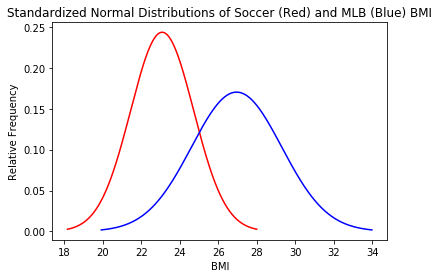

In [15]:
# Create variables storing the outputted normal distribution metrics
mu_soc = 23.0785
sigma_soc = 1.6382
mu_mlb = 26.9450
sigma_mlb = 2.3421

# Create 1000 length x-axis evenly spaced list based on 3 standard deviations of data
x_soc = numpy.linspace(mu_soc - 3 * sigma_soc, mu_soc + 3 * sigma_soc, 1000)
x_mlb = numpy.linspace(mu_mlb - 3 * sigma_mlb, mu_mlb + 3 * sigma_mlb, 1000)

# Create 1000 y-axis relative frequencies (probabilities) based on normal parameters
y_soc = stats.norm.pdf(x_soc, mu_soc, sigma_soc)
y_mlb = stats.norm.pdf(x_mlb, mu_mlb, sigma_mlb)

# Generate standardized normal curves based on the parameters above
pyplot.plot(x_soc, y_soc, color='red')
pyplot.plot(x_mlb, y_mlb, color='blue')

# Labels
pyplot.title('Standardized Normal Distributions of Soccer (Red) and MLB (Blue) BMI')
pyplot.xlabel('BMI')
pyplot.ylabel('Relative Frequency')

pyplot.show()

#### Using the true normal distribution metrics provided by our vast data sampling, we generated the above plots that represent relative frequencies (also probability) of a given BMI per sport including 3 standard deviations of range. There is some obvious and expected overlap across the 22-26 BMI range, but when focusing on each sports mean and highest frequency, there is an enormous difference in relative frequency/probability. 

In [16]:
# Compile x and y values of the above normal curves for use in probability
soccer_prob = [x_soc, y_soc]
mlb_prob = [x_mlb, y_mlb]

# Function to find nearest value since above curves have a finite number of data points
def nearest_i(arr, val):
    array = numpy.asarray(arr)
    idx = (numpy.abs(array - val)).argmin()
    return idx

# Find and print the probability of each sport based on these normal distributions
def sport_prob_bmi(bmi):
    # MLB Probability
    i_mlb = nearest_i(mlb_prob[0], bmi)
    prob_mlb = mlb_prob[1][i_mlb]
    
    # Soccer Probability
    i_soc = nearest_i(soccer_prob[0], bmi)
    prob_soc = soccer_prob[1][i_soc]
    
    total_prob = prob_mlb+prob_soc
    
    # Print Results
    print('Probability of EPL/MLS Soccer Player Based on BMI = ' + str(bmi) + ': ', prob_soc/total_prob)
    print('Probability of MLB Baseball Player Based on BMI = ' + str(bmi) + ': ', prob_mlb/total_prob)

#### Using the normal distributions generated above, we can take these as probability distributions for each sport with respect to BMI. With this information, we created a function sport_prob_bmi() which prints the relative probability of each sport based on BMI alone. 

In [17]:
# Test some BMI probabilities
sport_prob_bmi(20)
print()
sport_prob_bmi(22)
print()
sport_prob_bmi(24)
print()
sport_prob_bmi(26)
print()
sport_prob_bmi(28)
print()
sport_prob_bmi(30)

Probability of EPL/MLS Soccer Player Based on BMI = 20:  0.9520590798567531
Probability of MLB Baseball Player Based on BMI = 20:  0.047940920143246885

Probability of EPL/MLS Soccer Player Based on BMI = 22:  0.9144786562573021
Probability of MLB Baseball Player Based on BMI = 22:  0.0855213437426979

Probability of EPL/MLS Soccer Player Based on BMI = 24:  0.7293606317460699
Probability of MLB Baseball Player Based on BMI = 24:  0.2706393682539301

Probability of EPL/MLS Soccer Player Based on BMI = 26:  0.24122714963644826
Probability of MLB Baseball Player Based on BMI = 26:  0.7587728503635518

Probability of EPL/MLS Soccer Player Based on BMI = 28:  0.01725164640723837
Probability of MLB Baseball Player Based on BMI = 28:  0.9827483535927616

Probability of EPL/MLS Soccer Player Based on BMI = 30:  0.03593898203396808
Probability of MLB Baseball Player Based on BMI = 30:  0.9640610179660319


#### These results show some samples of the relative probabilities of BMI based on the standardized normal curves presented above, but how do they match up against our original, true data?

In [18]:
# Create a function that predicts sport in a simple manner based on greater probability
def sport_based_bmi(bmi):
    # MLB Probability
    i_mlb = nearest_i(mlb_prob[0], bmi)
    prob_mlb = mlb_prob[1][i_mlb]
    
    # Soccer Probability
    i_soc = nearest_i(soccer_prob[0], bmi)
    prob_soc = soccer_prob[1][i_soc]
        
    # Return higher probability sport
    if prob_soc > prob_mlb:
        return 'Soccer'
    else:
        return 'Baseball'

#### Using these probabilities, we created a function sport_based_bmi() that returns a binary sport prediciton (soccer or baseball) based on BMI alone. 

In [19]:
# Apply the prediction function to the original data
MLBData['Sport Prediction'] = [sport_based_bmi(b) for b in MLBData['BMI']]
SoccerData['Sport Prediction'] = [sport_based_bmi(b) for b in SoccerData['BMI']]

In [20]:
MLBData.head(5)

,Unnamed: 0,Team,Name,Age,Height,Weight,WAR,BMI,Position,Sport Prediction
0,0,ARI,Nick Ahmed,29,74,195,4.3,25.033784,SS,Baseball
1,1,ARI,Abraham Almonte,30,69,210,0.6,31.008192,RF,Baseball
2,2,ARI,Matt Andriese,29,74,225,-0.1,28.885135,P,Baseball
3,3,ARI,Alex Avila,32,71,210,1.4,29.285856,C,Baseball
4,4,ARI,Archie Bradley,26,76,225,0.9,27.384868,P,Baseball


In [21]:
SoccerData.head(5)

,Unnamed: 0,League,Team,Name,Position,Age,Height,Weight,BMI,Rating,Sport Prediction
0,0,EPL,Arsenal,Bernd Leno,Goalkeeper,28,75,183,22.870933,6.88,Soccer
1,2,EPL,Arsenal,Héctor Bellerín,Defender,25,70,163,23.385510,6.63,Soccer
2,3,EPL,Arsenal,Calum Chambers,Defender,25,72,146,19.798997,6.86,Soccer
3,4,EPL,Arsenal,Rob Holding,Defender,24,72,165,22.375579,6.25,Soccer
4,5,EPL,Arsenal,Pablo Marí,Defender,26,75,192,23.995733,7.37,Soccer


## After applying our prediction function to the original, all encompassing datasets, how often did our prediction match reality across EPL/MLS soccer data and MLB data?

In [22]:
# Find out frequency and relative frequency of accurate predictions in MLB
mlb_size = len(MLBData.index)
mlb_predictions = len(MLBData[MLBData['Sport Prediction'] == 'Baseball'].index)
print('Accurate MLB Predictions: ' + str(mlb_predictions) + ' / ' + str(mlb_size) + ' = ', mlb_predictions/mlb_size)

Accurate MLB Predictions: 1262 / 1567 =  0.805360561582642


In [23]:
# Find out frequency and relative frequency of accurate predictions in soccer
soccer_size = len(SoccerData.index)
soccer_predictions = len(SoccerData[SoccerData['Sport Prediction'] == 'Soccer'].index)
print('Accurate Soccer Predictions: ' + str(soccer_predictions) + ' / ' + str(soccer_size) + ' = ', soccer_predictions/soccer_size)

Accurate Soccer Predictions: 755 / 847 =  0.8913813459268005


In [24]:
# Find out frequency and relative frequency of accurate predictions across both sports
print('Accurate Sport Predictions Across MLB/MLS/EPL Data: ' + str(soccer_predictions+mlb_predictions) + ' / ' + str(mlb_size+soccer_size) + ' = ', (soccer_predictions+mlb_predictions)/(soccer_size+mlb_size))

Accurate Sport Predictions Across MLB/MLS/EPL Data: 2017 / 2414 =  0.8355426677713339


#### I'd say that's not too bad. We were able to predict sport with about 83.6% accuracy across a large sampling of 2414 soccer and MLB player BMI's. Considering this is a classification problem with only two outcomes, we have a baseline accuracy of 50%. This means our analysis provided a 33.6% improvement on baseline accuracy when predicting sport based on BMI.

# C. How can this prediction model be improved using a machine learning model?

#### We'll use a simple machine learning model called a decision tree to see how much better we can predict sport based on BMI, Height, and Weight.

In [25]:
# Copy CSV datasets as new variables for additional manipulation
soccer = SoccerData
baseball = MLBData

# Create new column with binary sport parameter 0=baseball, 1=soccer
soccer['Sport'] = 1
baseball['Sport'] = 0

#Make a dataframe with all players of both sports, and only the necessary columns, height, weight, BMI, and Sport
soccerfiltered = pandas.DataFrame(soccer.loc[:, ['Height', 'Weight', 'BMI', 'Sport']])
baseballfiltered = pandas.DataFrame(baseball.loc[:, ['Height', 'Weight', 'BMI', 'Sport']])
both = pandas.concat([soccerfiltered, baseballfiltered])
both.reset_index(inplace = True, drop = True)
both.head(5)

,Height,Weight,BMI,Sport
0,75,183,22.870933,1
1,70,163,23.385510,1
2,72,146,19.798997,1
3,72,165,22.375579,1
4,75,192,23.995733,1


#### Now that we have reorganized our data for a machine learning decision tree, we will make the tree!

In [26]:
# Create a decision tree model that takes in BMI height and weight 
model = DecisionTreeClassifier(max_depth = 11, criterion = 'entropy')

X = both[['BMI', 'Height', 'Weight']]
Y = both['Sport']

# Assign and fit the model to our above variables
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
model.fit(x_train, y_train)

# Use the ML model to predict sport
predictions = model.predict(x_test)
print('This model predicts sport accurately based on BMI {:.2f}'.format(accuracy_score(predictions, y_test) * 100),\
      '% of the time')

This model predicts sport accurately based on BMI 90.09 % of the time


#### This machine learning model was capable of predicting sport based on BMI about 7% better than our simple method using the normal distributions as probabilities!

#### Below we have visualized the decision tree and you can see the first three out of eleven layers of the decision tree, and the questions it is asking to determine what sport each height, weight, and BMI fit into.

[Text(1798.0, 3397.5, 'Weight <= 187.5\nentropy = 0.927\nsamples = 1617\nvalue = [1063, 554]\nclass = Soccer'),
 Text(992.0, 2642.5, 'Weight <= 174.5\nentropy = 0.789\nsamples = 648\nvalue = [153, 495]\nclass = Baseball'),
 Text(496.0, 1887.5, 'Weight <= 159.5\nentropy = 0.471\nsamples = 408\nvalue = [41, 367]\nclass = Baseball'),
 Text(248.0, 1132.5, 'Weight <= 150.5\nentropy = 0.139\nsamples = 205\nvalue = [4, 201]\nclass = Baseball'),
 Text(124.0, 377.5, '\n  (...)  \n'),
 Text(372.0, 377.5, '\n  (...)  \n'),
 Text(744.0, 1132.5, 'BMI <= 22.325\nentropy = 0.685\nsamples = 203\nvalue = [37, 166]\nclass = Baseball'),
 Text(620.0, 377.5, '\n  (...)  \n'),
 Text(868.0, 377.5, '\n  (...)  \n'),
 Text(1488.0, 1887.5, 'BMI <= 24.952\nentropy = 0.997\nsamples = 240\nvalue = [112, 128]\nclass = Baseball'),
 Text(1240.0, 1132.5, 'BMI <= 24.473\nentropy = 0.953\nsamples = 174\nvalue = [65, 109]\nclass = Baseball'),
 Text(1116.0, 377.5, '\n  (...)  \n'),
 Text(1364.0, 377.5, '\n  (...)  \n'),
 

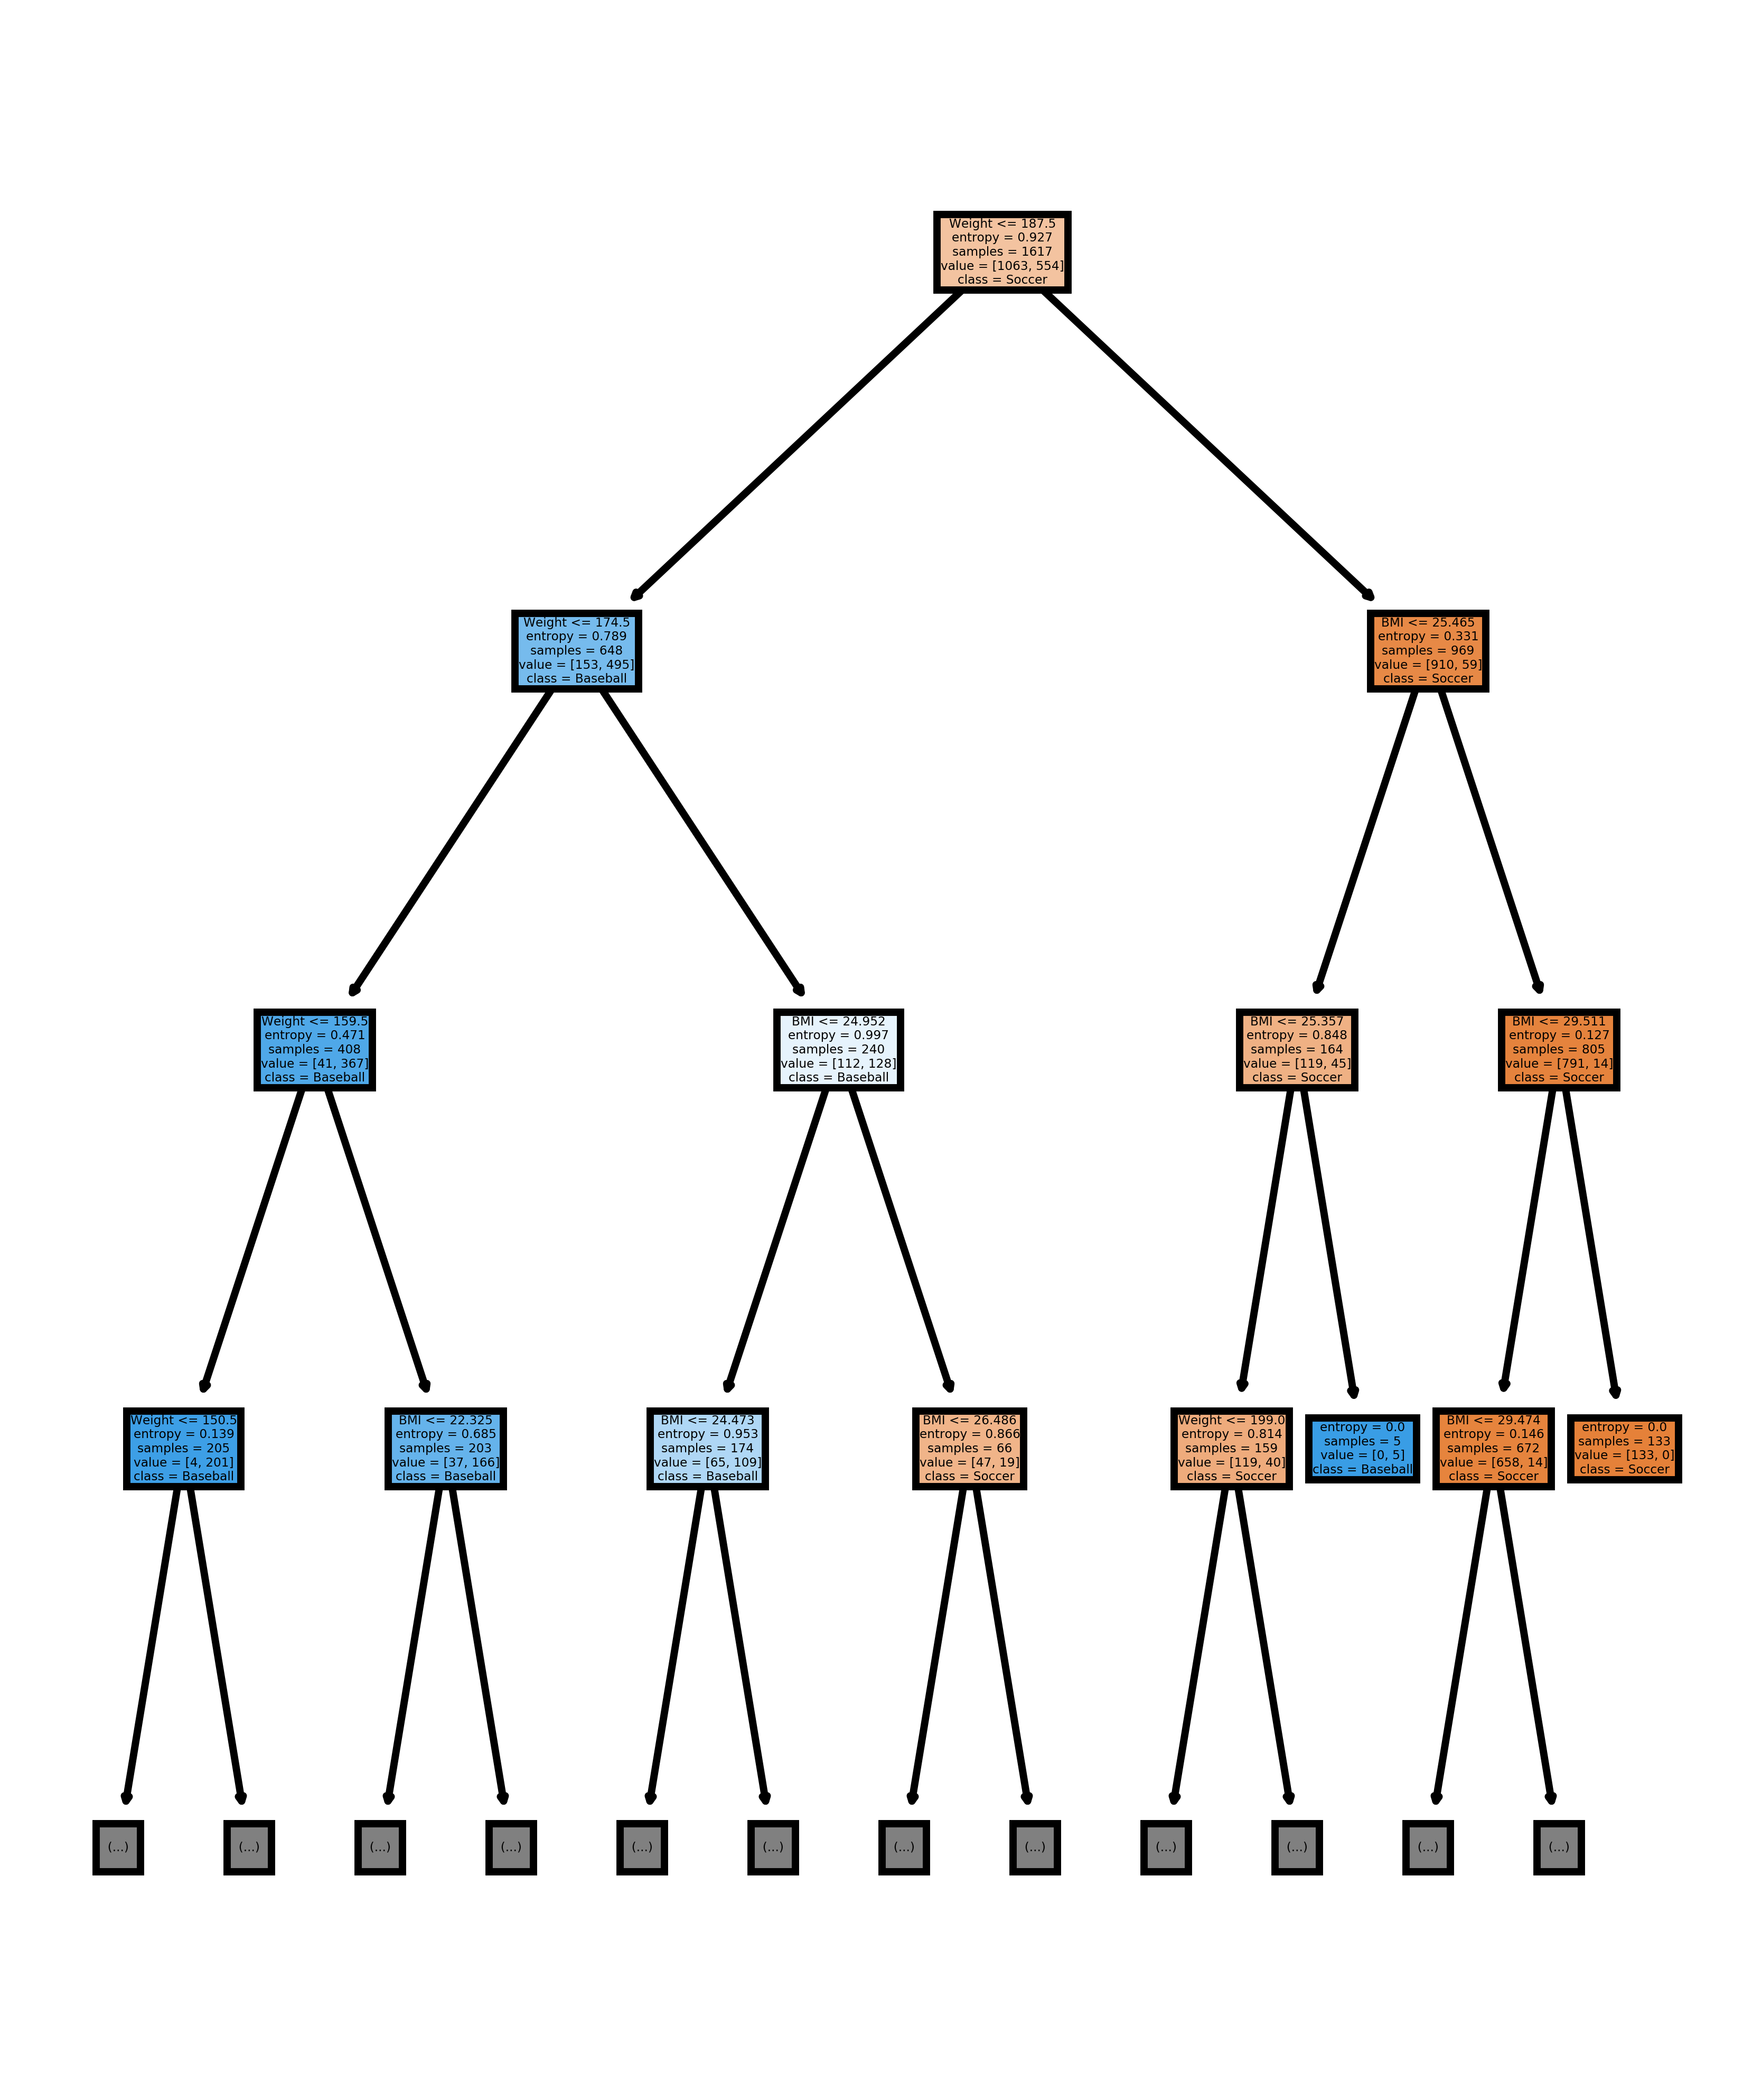

In [27]:
# Visualize the decision tree
fig, axes = pyplot.subplots(nrows = 1,ncols = 1,figsize = (4,5), dpi=1000)

plot_tree(model, feature_names = ['BMI', 'Height', 'Weight'], class_names = ['Soccer', 'Baseball'], \
          max_depth = 3, filled = True)

#### And finally, here you can see the whole decision tree and it is also printed out below. It is rather difficult to read when printed out so small with so many legs and components. 

[Text(2019.8090692124106, 3617.7083333333335, 'Weight <= 187.5\nentropy = 0.927\nsamples = 1617\nvalue = [1063, 554]\nclass = Soccer'),
 Text(1172.673031026253, 3303.125, 'Weight <= 174.5\nentropy = 0.789\nsamples = 648\nvalue = [153, 495]\nclass = Baseball'),
 Text(386.1127684964201, 2988.541666666667, 'Weight <= 159.5\nentropy = 0.471\nsamples = 408\nvalue = [41, 367]\nclass = Baseball'),
 Text(88.78281622911695, 2673.9583333333335, 'Weight <= 150.5\nentropy = 0.139\nsamples = 205\nvalue = [4, 201]\nclass = Baseball'),
 Text(59.18854415274463, 2359.375, 'entropy = 0.0\nsamples = 109\nvalue = [0, 109]\nclass = Baseball'),
 Text(118.37708830548927, 2359.375, 'Weight <= 151.5\nentropy = 0.25\nsamples = 96\nvalue = [4, 92]\nclass = Baseball'),
 Text(59.18854415274463, 2044.7916666666667, 'BMI <= 22.627\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Soccer'),
 Text(29.594272076372317, 1730.2083333333335, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Baseball'),
 Text(88.78281

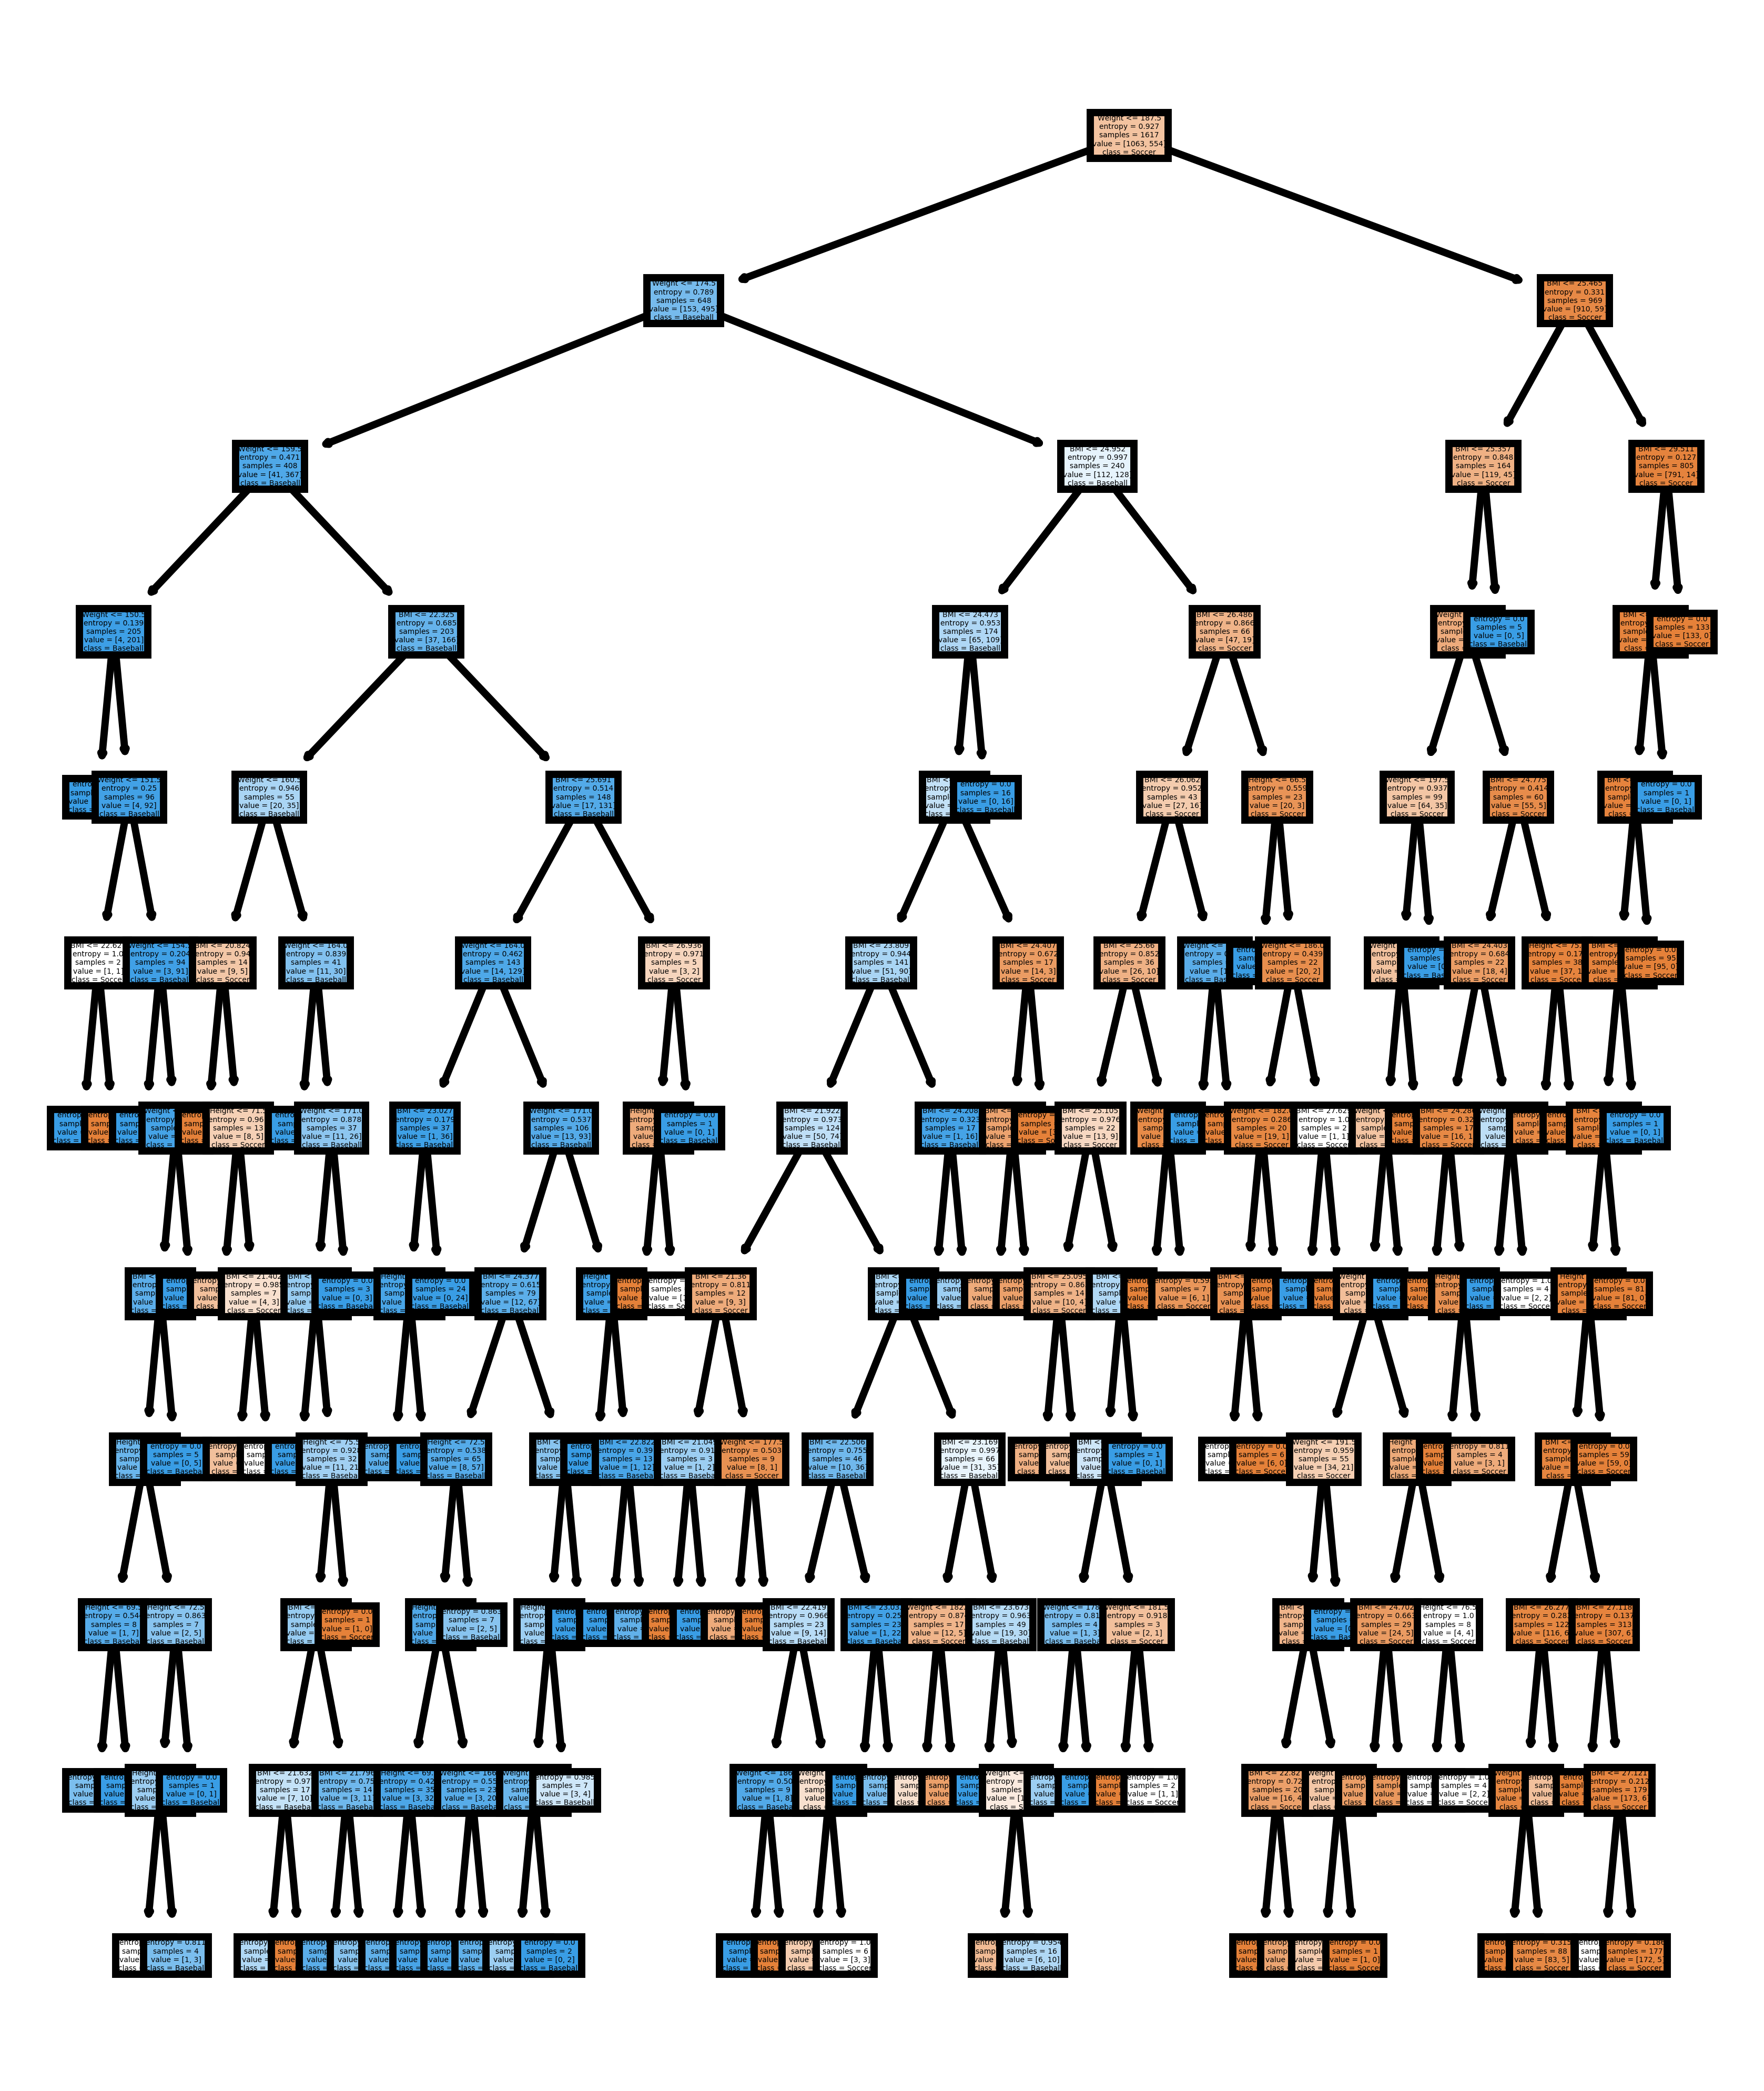

In [28]:
# Print out decision tree
fig, axes = pyplot.subplots(nrows = 1,ncols = 1,figsize = (4,5), dpi=1000)

plot_tree(model, feature_names = ['BMI', 'Height', 'Weight'], class_names = ['Soccer', 'Baseball'], filled = True)

# Conclusion:

### This analysis led us to the following conclusions:

- There is no statistically significant difference between height and weight regression slopes when it comes to baseball vs. soccer although there is a relatively large difference in weight intercept and mean difference in weight. This difference was extrapolated to show a significant ~20% difference in mean BMI and a ~30% difference in BMI standard deviation due to the higher variance in MLB body types when compared to soccer.

- BMI can be a solid predictor of whether an athlete plays soccer or baseball, achieving the right prediction 83% of the time using BMI normal distributions.

- We were able to improve upon this simple normal model using a machine learning decision tree to achieve an accurate prediction 90% of the time taking in BMI, height and weight as parameters.

- Our models could almost certainly be further improved with more analysis of sport dependent characteristics of players and incorperating them into our models.

### Furthermore, we are confident in our data and conclusions because we used a large sample size of some of the most prestigious sports leagues and players in the world, and because the sources of the data were reputable. Additionally, we used tried and true data analysis and interpretation methods.

### In a wider context, this data can be used for athletes training to play a particular sport. If somebody wants to train to become a pro soccer player, they can exercise with a target BMI range in mind, based on our data collection and analysis. 
